In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
seq_data = pd.read_csv('results/seq.csv', index_col='n')

seq_data = seq_data.groupby(seq_data.index).agg(np.median)
seq_data.index.name = 'N'
seq_data.columns = ['Secuencial']
seq_data.columns.name = 'Hilos'

seq_data

Hilos,Secuencial
N,
5000000,0.055
10000000,0.102
15000000,0.152
20000000,0.202
25000000,0.252
30000000,0.302
35000000,0.352
40000000,0.402
45000000,0.453


In [3]:
v3_data = pd.read_csv('results/v3.csv')
v3_data.columns = ['N', 'Hilos', 'Tiempo']

v3_data = v3_data.groupby([v3_data['N'], v3_data['Hilos']]).agg(np.median).reset_index()
v3_data = v3_data.pivot(index='N', columns='Hilos', values='Tiempo')
v3_data

Hilos,3,6,12,24,48,96
N,,,,,,
5000000,0.0400,0.0300,0.0220,0.0140,0.0170,0.0200
10000000,0.0640,0.0425,0.0320,0.0240,0.0250,0.0360
15000000,0.0895,0.0595,0.0395,0.0280,0.0315,0.0430
20000000,0.1140,0.0700,0.0465,0.0330,0.0380,0.0470
25000000,0.1375,0.0850,0.0525,0.0395,0.0450,0.0530
30000000,0.1625,0.0960,0.0595,0.0435,0.0480,0.0550
35000000,0.1870,0.1105,0.0705,0.0490,0.0545,0.0650
40000000,0.2090,0.1220,0.0705,0.0550,0.0630,0.0720
45000000,0.2340,0.1355,0.0800,0.0600,0.0665,0.0730


In [4]:
v2_data = pd.read_csv('results/v2.csv')
v2_data.columns = ['N', 'Hilos', 'Tiempo']

v2_data = v2_data.groupby([v2_data['N'], v2_data['Hilos']]).agg(np.median).reset_index()
v2_data = v2_data.pivot(index='N', columns='Hilos', values='Tiempo')
v2_data

Hilos,3,6,12,24,48,96
N,,,,,,
5000000,0.0360,0.0260,0.0175,0.0130,0.0150,0.0190
10000000,0.0570,0.0360,0.0240,0.0200,0.0220,0.0300
15000000,0.0750,0.0475,0.0320,0.0290,0.0280,0.0340
20000000,0.0965,0.0605,0.0350,0.0355,0.0330,0.0400
25000000,0.1180,0.0660,0.0445,0.0410,0.0365,0.0455
30000000,0.1370,0.0835,0.0470,0.0455,0.0430,0.0515
35000000,0.1555,0.0885,0.0530,0.0505,0.0530,0.0565
40000000,0.1760,0.1000,0.0630,0.0520,0.0525,0.0635
45000000,0.1970,0.1120,0.0640,0.0565,0.0620,0.0710


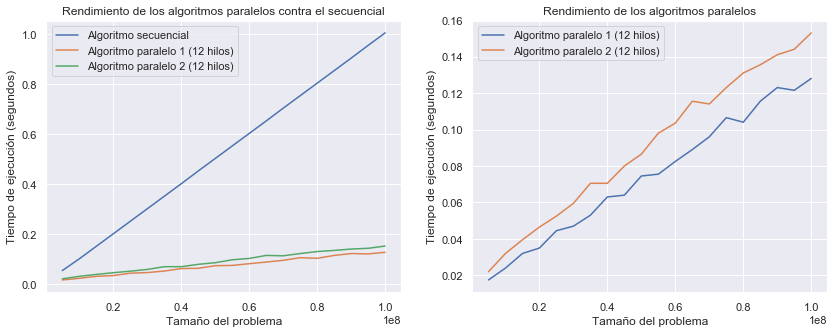

In [5]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(14, 5)

ax1.plot(seq_data, label='Algoritmo secuencial')

ax1.plot(v2_data[12], label='Algoritmo paralelo 1 (12 hilos)')
ax1.plot(v3_data[12], label='Algoritmo paralelo 2 (12 hilos)')
ax1.legend()

ax1.set_ylabel("Tiempo de ejecución (segundos)")
ax1.set_xlabel("Tamaño del problema")
ax1.set_title('Rendimiento de los algoritmos paralelos contra el secuencial')

ax2.plot(v2_data[12], label='Algoritmo paralelo 1 (12 hilos)')
ax2.plot(v3_data[12], label='Algoritmo paralelo 2 (12 hilos)')
ax2.legend()

ax2.set_ylabel("Tiempo de ejecución (segundos)")
ax2.set_xlabel("Tamaño del problema")
ax2.set_title('Rendimiento de los algoritmos paralelos')

fig.savefig('charts/square-perf.png')

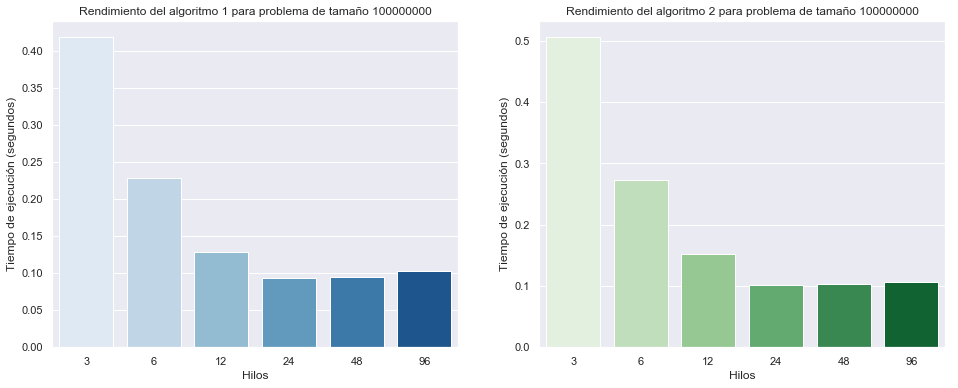

In [6]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(16, 6)

size = v2_data.iloc[-1].name

v2_plt = sns.barplot(x=v2_data.iloc[-1].index, y=v2_data.iloc[-1],
                     palette="Blues", ax=ax1)
v2_plt.set_title('Rendimiento del algoritmo 1 para problema de tamaño {}'.format(size))
v3_plt = sns.barplot(x=v3_data.iloc[-1].index, y=v3_data.iloc[-1],
                     palette="Greens", ax=ax2)
v3_plt.set_title('Rendimiento del algoritmo 2 para problema de tamaño {}'.format(size))

# row_plt = row_data.iloc[-1].plot(title='Rendimiento del algoritmo por filas para matriz de tamaño 5000',
#                                 ax=ax1, kind='bar', colormap='plasma')
v2_plt.set_ylabel('Tiempo de ejecución (segundos)')
v3_plt.set_ylabel('Tiempo de ejecución (segundos)')

fig.savefig('charts/square-perf-bar.png')

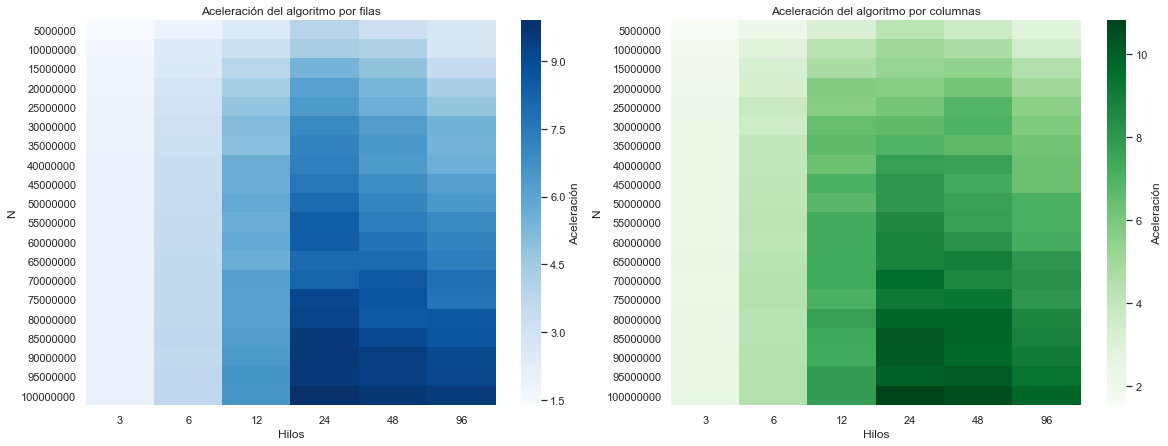

In [7]:
v2_accel =  (1 / v2_data).mul(seq_data['Secuencial'], axis=0)
v3_accel =  (1 / v3_data).mul(seq_data['Secuencial'], axis=0)

fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(16, 6)
fig.tight_layout(pad=1.08, h_pad=None, w_pad=4, rect=None)

sns.heatmap(v3_accel, cbar_kws={'label': 'Aceleración'},
            cmap='Blues', ax=ax1).set_title("Aceleración del algoritmo por filas")

sns.heatmap(v2_accel, cbar_kws={'label': 'Aceleración'}, cmap='Greens',
            ax=ax2).set_title("Aceleración del algoritmo por columnas")

fig.savefig('charts/square-accel.png')

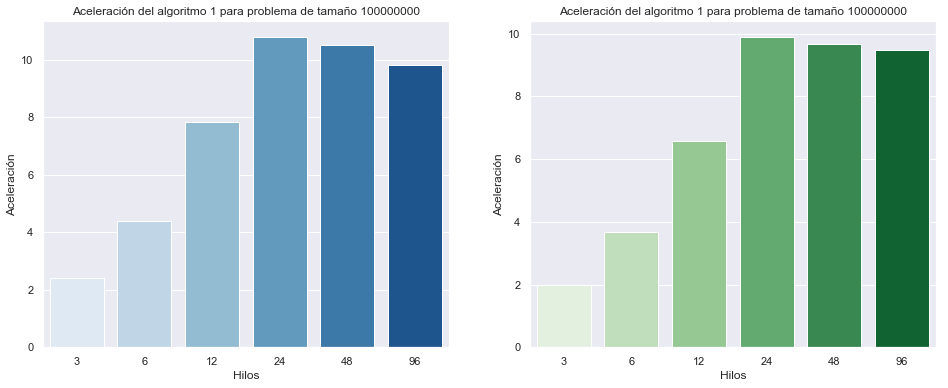

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(16, 6)

size = v2_data.iloc[-1].name

v2_plt = sns.barplot(x=v2_accel.iloc[-1].index, y=v2_accel.iloc[-1],
                     palette="Blues", ax=ax1)
v2_plt.set_title('Aceleración del algoritmo 1 para problema de tamaño {}'.format(size))
v3_plt = sns.barplot(x=v3_accel.iloc[-1].index, y=v3_accel.iloc[-1],
                       palette="Greens", ax=ax2)
v3_plt.set_title('Aceleración del algoritmo 1 para problema de tamaño {}'.format(size))

# row_plt = row_data.iloc[-1].plot(title='Rendimiento del algoritmo por filas para matriz de tamaño 5000',
#                                 ax=ax1, kind='bar', colormap='plasma')
v2_plt.set_ylabel('Aceleración')
v3_plt.set_ylabel('Aceleración')

fig.savefig('charts/square-accel-bar.png')

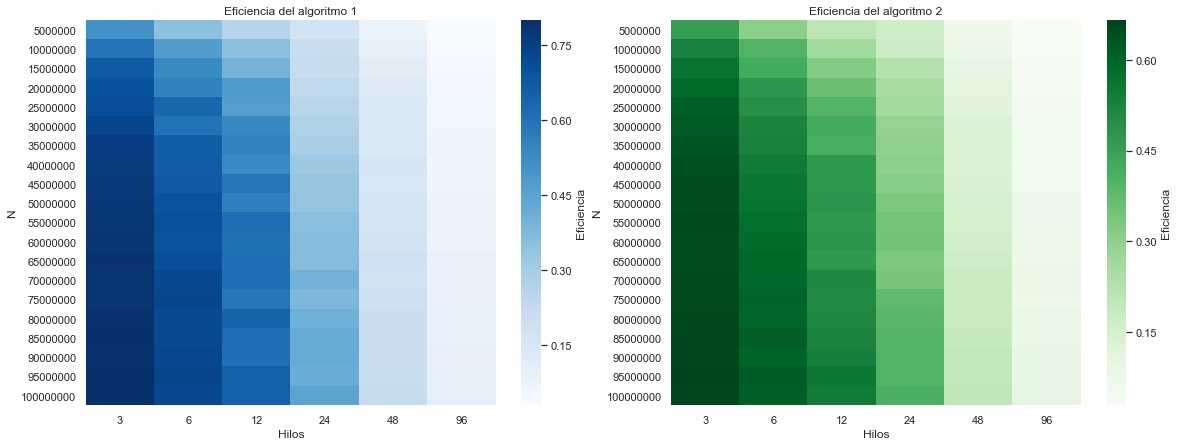

In [9]:
n_threads = v2_data.columns

v2_efficiency = v2_accel / n_threads
v3_efficiency = v3_accel / n_threads

fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(16, 6)
fig.tight_layout(pad=1.08, h_pad=None, w_pad=4, rect=None)

sns.heatmap(v2_efficiency, cmap='Blues', cbar_kws={'label': 'Eficiencia'},
            ax=ax1).set_title("Eficiencia del algoritmo 1")

sns.heatmap(v3_efficiency, cmap='Greens', cbar_kws={'label': 'Eficiencia'},
            ax=ax2).set_title("Eficiencia del algoritmo 2")

fig.savefig('charts/square-eff.png')

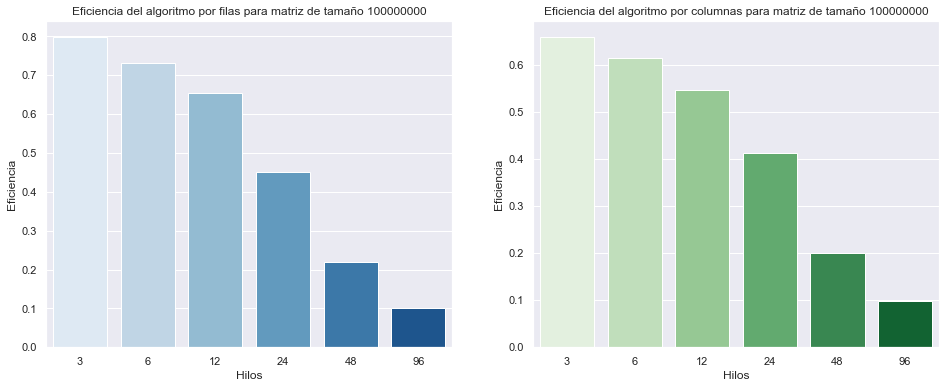

In [10]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(16, 6)

size = v3_data.iloc[-1].name

v2_plt = sns.barplot(x=v2_efficiency.iloc[-1].index, y=v2_efficiency.iloc[-1],
                      palette="Blues", ax=ax1)
v2_plt.set_title('Eficiencia del algoritmo por filas para matriz de tamaño {}'.format(size))
v3_plt = sns.barplot(x=v3_efficiency.iloc[-1].index, y=v3_efficiency.iloc[-1],
                      palette="Greens", ax=ax2)
v3_plt.set_title('Eficiencia del algoritmo por columnas para matriz de tamaño {}'.format(size))

# row_plt = row_data.iloc[-1].plot(title='Rendimiento del algoritmo por filas para matriz de tamaño 5000',
#                                 ax=ax1, kind='bar', colormap='plasma')
v2_plt.set_ylabel('Eficiencia')
v3_plt.set_ylabel('Eficiencia')
fig.savefig('charts/square-eff-bar.png')

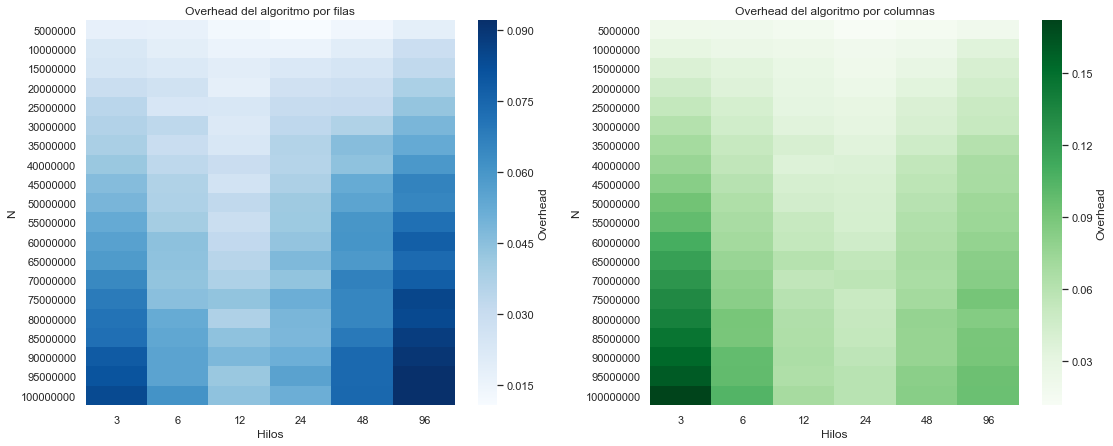

In [11]:
v2_serial_time = pd.concat([seq_data] * (len(n_threads)), axis=1)
v3_serial_time = pd.concat([seq_data] * (len(n_threads)), axis=1)

v2_serial_time.columns = n_threads
v3_serial_time.columns = n_threads

v2_overhead = v2_data - (v2_serial_time / n_threads)
v3_overhead = v3_data -  (v3_serial_time / n_threads)

fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(15, 6)
fig.tight_layout(pad=1.08, h_pad=None, w_pad=7, rect=None)

sns.heatmap(v2_overhead, cmap='Blues', cbar_kws={'label': 'Overhead'},
            ax=ax1).set_title("Overhead del algoritmo por filas")

sns.heatmap(v3_overhead, cmap='Greens', cbar_kws={'label': 'Overhead'},
            ax=ax2).set_title("Overhead del algoritmo por columnas")

fig.savefig('charts/square-overhead.png')

In [17]:
print(pd.concat([seq_data, v2_data], axis=1).to_latex())
print(pd.concat([seq_data, v3_data], axis=1).to_latex())

\begin{tabular}{lrrrrrrr}
\toprule
Hilos &  Secuencial &       3 &       6 &      12 &      24 &      48 &      96 \\
N         &             &         &         &         &         &         &         \\
\midrule
5000000   &       0.055 &  0.0360 &  0.0260 &  0.0175 &  0.0130 &  0.0150 &  0.0190 \\
10000000  &       0.102 &  0.0570 &  0.0360 &  0.0240 &  0.0200 &  0.0220 &  0.0300 \\
15000000  &       0.152 &  0.0750 &  0.0475 &  0.0320 &  0.0290 &  0.0280 &  0.0340 \\
20000000  &       0.202 &  0.0965 &  0.0605 &  0.0350 &  0.0355 &  0.0330 &  0.0400 \\
25000000  &       0.252 &  0.1180 &  0.0660 &  0.0445 &  0.0410 &  0.0365 &  0.0455 \\
30000000  &       0.302 &  0.1370 &  0.0835 &  0.0470 &  0.0455 &  0.0430 &  0.0515 \\
35000000  &       0.352 &  0.1555 &  0.0885 &  0.0530 &  0.0505 &  0.0530 &  0.0565 \\
40000000  &       0.402 &  0.1760 &  0.1000 &  0.0630 &  0.0520 &  0.0525 &  0.0635 \\
45000000  &       0.453 &  0.1970 &  0.1120 &  0.0640 &  0.0565 &  0.0620 &  0.0710 \\
500